Index(['Id', 'Diagnosis', 'Radius (mean)', 'Texture (mean)',
       'Perimeter (mean)', 'Area (mean)', 'Smoothness (mean)',
       'Compactness (mean)', 'Concavity (mean)', 'Concave points (mean)',
       'Symmetry (mean)', 'Fractal dimension (mean)', 'Radius (se)',
       'Texture (se)', 'Perimeter (se)', 'Area (se)', 'Smoothness (se)',
       'Compactness (se)', 'Concavity (se)', 'Concave points (se)',
       'Symmetry (se)', 'Fractal dimension (se)', 'Radius (worst)',
       'Texture (worst)', 'Perimeter (worst)', 'Area (worst)',
       'Smoothness (worst)', 'Compactness (worst)', 'Concavity (worst)',
       'Concave points (worst)', 'Symmetry (worst)',
       'Fractal dimension (worst)'],
      dtype='object')


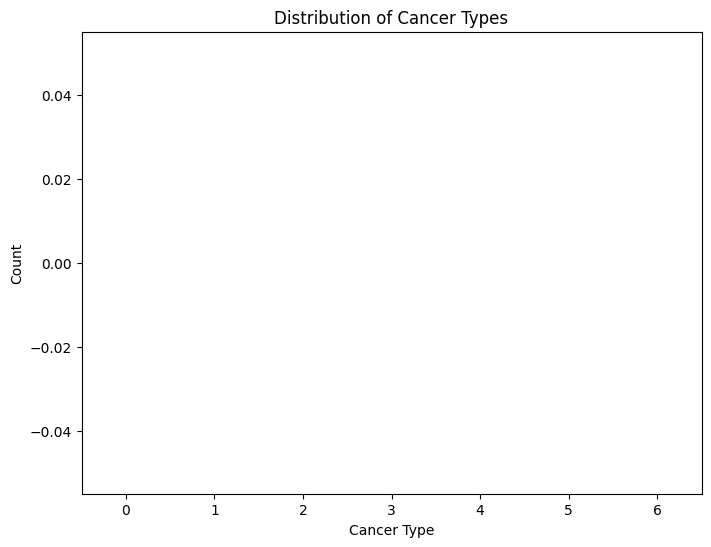

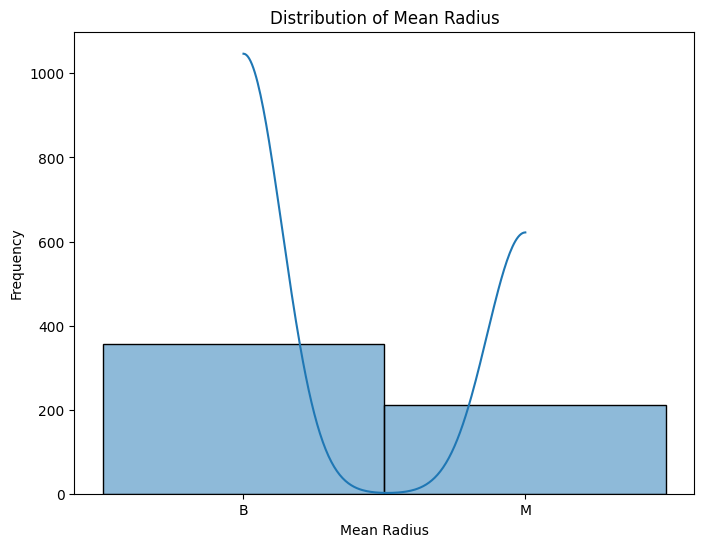

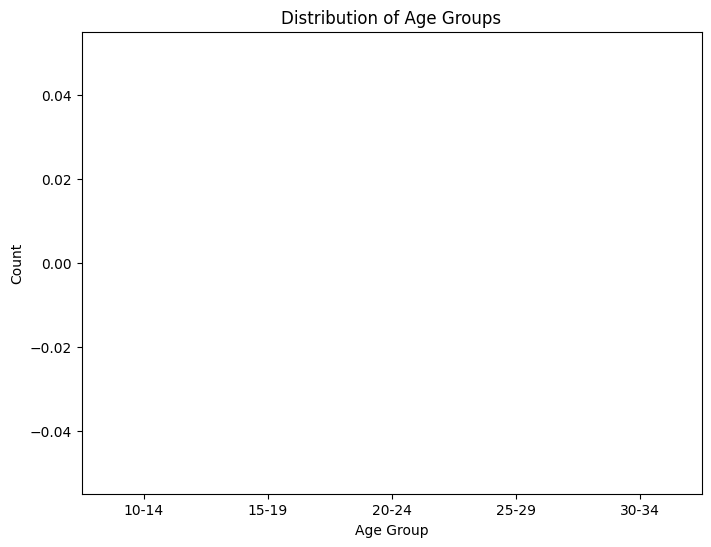

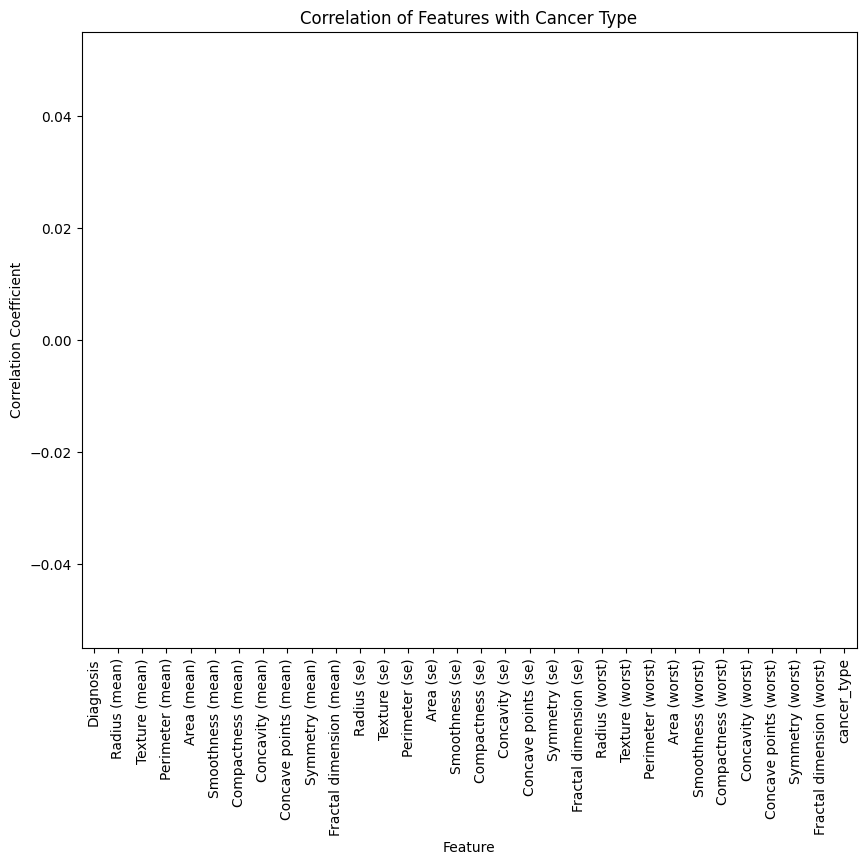

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = pd.read_csv("/content/cancer.csv")
print(data.columns)


target_column = data.columns[0]
data['cancer_type'] = data[target_column].map({'M': 'Malignant', 'B': 'Benign'})

# Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='cancer_type', data=data)
plt.title('Distribution of Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.show()

# Histogram
feature_column = data.columns[1]
plt.figure(figsize=(8, 6))
sns.histplot(data[feature_column], bins=10, kde=True)
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()

# Bar Chart
data[feature_column] = pd.to_numeric(data[feature_column], errors='coerce')
age_groups = pd.cut(data[feature_column], bins=[10, 15, 20, 25, 30, 35], labels=['10-14', '15-19', '20-24', '25-29', '30-34'])
plt.figure(figsize=(8, 6))
sns.countplot(x=age_groups, data=data)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Bar Chart
correlation = data.drop(target_column, axis=1).corrwith(data[target_column].map({'M': 1, 'B': 0}))
correlation = correlation.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Correlation of Features with Cancer Type')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()